## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

*Disclaimer: No lugar de usar uma arvore de tamanho 8, utilizei uma de tamanho 6 para não estressar mais o Computador, tamanho 8 estava demorando muito mais*

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


import matplotlib.pyplot as plt



%matplotlib inline

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv('housing.csv')
df['ocean_proximity_code'] = pd.factorize(df['ocean_proximity'])[0]
df.drop('ocean_proximity', axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [3]:
# Separar os dados em treino e teste (80% para treino e 20% para teste)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=27)

# Separar os dados de treino em treino e validação (75% do total original para treino e 25% para validação)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=27)

X = df[['population','total_bedrooms']]
y = df['median_income']

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


# Preencher valores NaN com a média das colunas
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# 8
tree_reg_8 = DecisionTreeRegressor(max_depth=6, random_state=27)
tree_reg_8.fit(X_train, y_train)


# Previsões
y_pred_8 = tree_reg_8.predict(X_test)


# MSE
mse_8 = mean_squared_error(y_test, y_pred_8)


print(f'MSE da árvore com profundidade máxima de 8: {mse_8:.2f}')


MSE da árvore com profundidade máxima de 8: 3.54


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [4]:
path = tree_reg_8.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 3.13575703e-06, 1.02456397e-04, 2.16189280e-04,
        2.34920321e-04, 2.54419363e-04, 2.58227039e-04, 2.86634765e-04,
        4.49976026e-04, 4.58395117e-04, 4.79272892e-04, 6.00870671e-04,
        6.31658968e-04, 6.38134369e-04, 6.58934111e-04, 7.26782591e-04,
        7.87186689e-04, 8.01137694e-04, 9.63238765e-04, 1.00379046e-03,
        1.02574286e-03, 1.04698859e-03, 1.46630145e-03, 1.65790374e-03,
        1.97334772e-03, 1.97354102e-03, 2.29696971e-03, 2.61786941e-03,
        2.64266747e-03, 2.99241754e-03, 3.90395378e-03, 4.22297973e-03,
        4.67006343e-03, 5.72430566e-03, 6.10936377e-03, 6.50645029e-03,
        7.30166430e-03, 9.47313877e-03, 1.13885953e-02, 1.27442804e-02,
        1.60007253e-02]),
 'impurities': array([3.42832542, 3.42832856, 3.42843102, 3.4286472 , 3.42888212,
        3.42913654, 3.42939477, 3.42968141, 3.43013138, 3.43058978,
        3.43106905, 3.43166992, 3.43230158, 3.43357785, 3.43423678,
        3.43496357, 3.

In [5]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, impurities)

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [6]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [7]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

Text(0, 0.5, 'Profundidade da árvore')

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [8]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

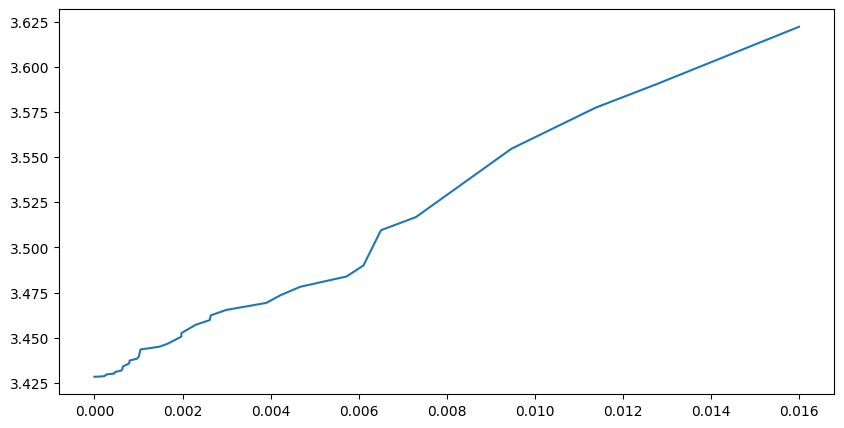

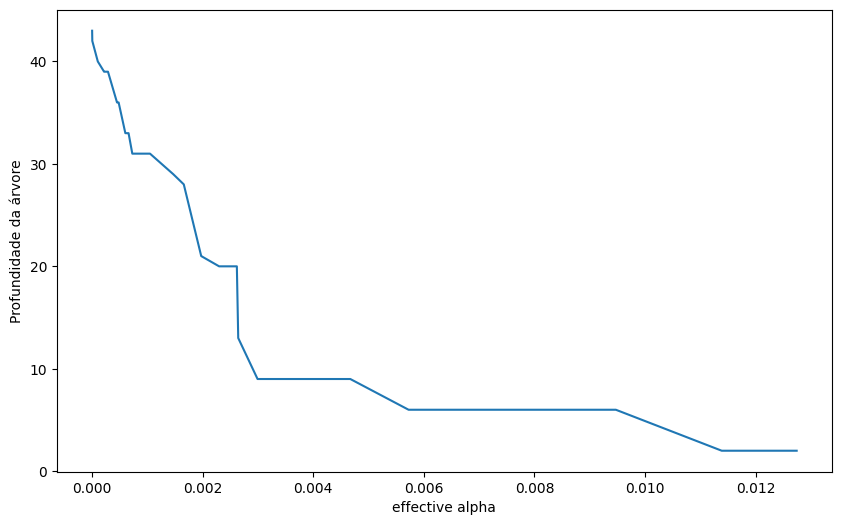

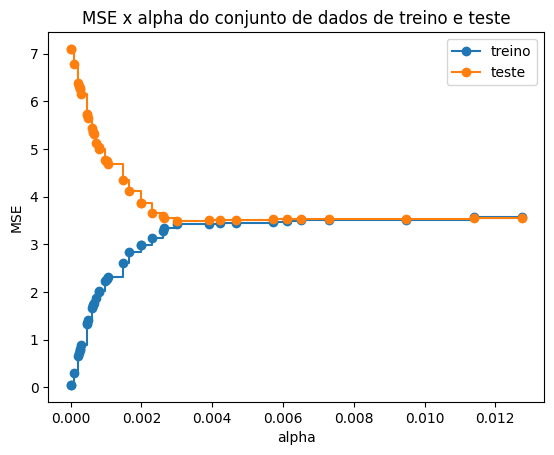

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [10]:
arvore_final = DecisionTreeRegressor(random_state=0,ccp_alpha=0.009)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):2f}')


Profundidade: 6
MSE na base de testes: 3.535490


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [11]:
print(f'R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')

R-quadrado na base de testes: 0.01


### 7. Visualize esta árvore.

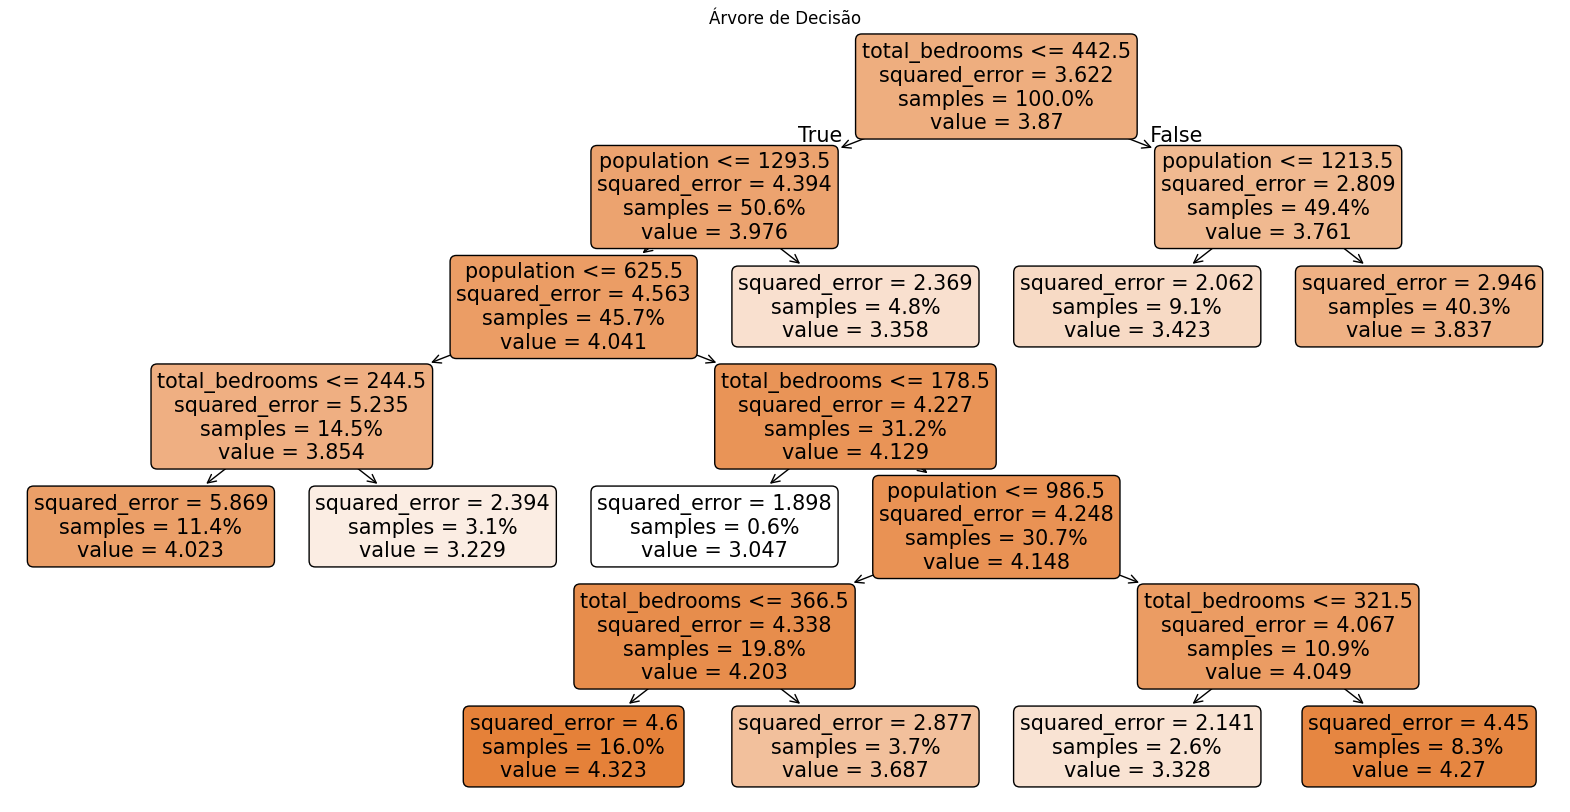

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(arvore_final, filled=True, feature_names=['population', 'total_bedrooms'], rounded=True, proportion=True)
plt.title("Árvore de Decisão")
plt.show()